In [1]:
# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

# The flowers at the water's edge: a report on the flora of the urban Suze river

## Abstract

This report concludes a 2020 hammerdirt pilot project in identifying plant species along the urban Suze river and its Madretschkanal variant from June - September 2020. The objective was to use plant recognition web and smartphone applications combined with the Flora Helvetica guidebook to identify herbaceous plants, construct an initial set of data on the flowering plants along the urban Suze river, and provide initial analysis and lessons learned to guide further project development.

In [2]:
# this_picture = PILImage.open("resources/pictures/carduus-crispus.JPG")
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='PNG')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*Carduus crispus growing on the banks of the Madretschkanal*

## Background

Ecological systems in Europe are under intense stress from various human pressures. Extinction rates are high and on the rise, especially among species dependent on ecological niches that have experienced significant decline, such as wetland habitats and wildflower meadows. The current rate of extinction globally is estimated to be around 10X - 100X higher than the background extinction rate, and is often characterized by extinction without replacement, which further leads to the loss of integrity of ecological systems. In addition to extinctions, we see the rarefaction of formerly common species and a general decline in the total mass of wild mammals, birds and insects. An example of this which prompted serious reflection among scientists, civil society and governments is a 2017 paper which identified a 75% decline between 1989 and 2017 in flying insect mass in nature reserves in Southern Germany. Where long term data on insect populations is available, all evidence points to a long term decline across Europe with an estimated 10% of pollinator species being considered threatened with extinction. Europe's flora faces similar challenges: half of the continents endemic tree species are threatened.
<p>&nbsp;</p>
In Switzerland, more than a quarter of Swiss vascular plants are under threat with "thousands of local extinctions" of sensitive and endangered species. These localized extinctions are most prominent in Switzerland's Central Plateau region. This is partially due to the unique bio-geography of this region and partially due to the intense human pressures on the Central Plateau, home to most of Switzerland's agricultural output and where 70% of the population lives and works. 60% of the vascular plant species evaluated for the International Union of the Conservation of Nature's Redlist are classified as potentially or actually regionally threatened in the Central Plateau, followed by 50% of evaluated species for the Jura. As Biel lies on the border between two regions, the city has an opportunity and a responsibility to act.
<p>&nbsp;</p>
As the researchers who identified these local extinctions put it :
> Our study presents clear evidence that current efforts
to conserve threatened plant species are insufficient to
achieve national and international targets (Convention
on Biological Diversity (CBD), 2011; Swiss Biodiversity
Strategy 2012) for maintaining biodiversity. The current
paradigm of protecting and restoring threatened habitats
is failing to avert extinctions. Going forward, we need to
develop a comprehensive landscape approach, involving
the creation of ecological infrastructure and translocation
and assisted migration of threatened species into suitable
habitats.

Similarly, the situation for insects and especially pollinators, often taken as key biological indicators, is extremely worrying. Of the 226 butterfly and moth species monitored nationally (out of some 3700 lepidotpera species confirmed in Switzerland), just over 50% are considered to be under threat or potentially under threat.  Switzerland has not escaped the pan European decline in insect populations and diversity and researchers are clear that significant steps need to be taken immediately to reverse these trends. Most of this loss is occurring due to insecticides, ever increasing intensification of agriculture, and continued artificialisation of land for residential, agricultural or commercial purposes.
<p>&nbsp;</p>
While national actors work to set standards and engage in international negotiations to protect biodiversity and ecosystem health on a global scale, local public and private actors have significant room to maneuver. It is well known that one way to mitigate some of the anthropologic pressure is a judicious use of public spaces, such as road verges, railroad berms and parks, that balances their potential as habitats with the needs and requirements of the city's inhabitants. Allowing spaces to go un-mowed, sowing flower beds, and creating micro-habitats strategically throughout urban and suburban areas are small, relatively cost-neutral steps that can have marginal but important impacts. In fact, studies have shown that (sub)urban green spaces and road verges can provide plants, insects and birds with suitable conditions to pursue their life cycles and even become a "last refuge" for certain species.
<p>&nbsp;</p>
At the same time, it is important to consider the effectiveness of the actions being taken by local authorities. Annual flower meadows for pollinators are an increasingly common sight in different countries, yet provide only a fraction of the resources of perennial meadows, which themselves do not provide resources as continuously throughout the year as remnant weed populations. There are many factors to consider, and unraveling the complex web of ecosystem interdependence remains on the frontier of science. Beyond the ecological questions, there is also the question of genetic diversity. A significant part of biodiversity that had been overlooked until relatively recently, genetic diversity is required for the long term health and success of populations. This project will not address these questions directly, but will build the knowledge to begin addressing them during the second iteration. 

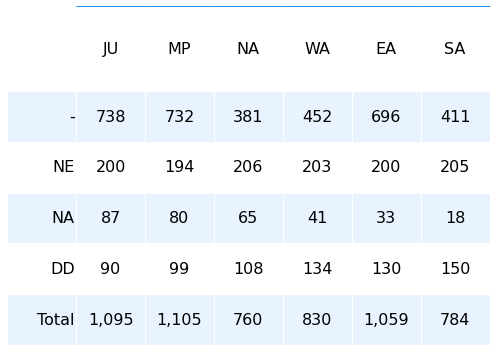

In [3]:
# a convenience function to make pretty tables:
def make_a_summary_table(ax, data, cols_to_use, a_color='dodgerblue', font_size=12, s_et_bottom_row=True):
    """ Makes a table of values with alternate row cololrs.

    Args:
        ax: object: matplotlib table object
        data: array: the 2d array used to generate the table object
        cols_to_use: array: the list of column names
        a_color: str: matplotlib named color, face and edgecolor of table cells
        font_size: int: the font size for the table cells
        s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
        The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = colors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i, x in enumerate(cols_to_use)]
    bottom_row = [(len(data), i) for i, x in enumerate(cols_to_use)]
    top_columns = top_row[1:]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
    odd_rows = [x for x in data_rows if x[0] % 2 > 0]
    first_column = [x for x in data_rows if x[1] == 0]

    # make the first cell a littel smaller than the others
    ax[0, 0].set_height(1 / (len(data)))
    ax[0, 0].set_text_props(**{'va': 'top'})

    for a_cell in top_row:
        ax[a_cell].visible_edges = 'B'
        ax[a_cell].set_text_props(**{'fontsize': font_size})
        ax[a_cell].set_edgecolor('white')
        ax[a_cell].PAD = .2

    for a_cell in top_columns:
        ax[a_cell].set_height((1.25 / (len(data))))
        ax[a_cell].set_text_props(**{'va': 'center'})

        ax[a_cell].set_edgecolor(line_color)
        ax[a_cell].visible_edges = 'T'

    for a_cell in odd_rows:
        ax[a_cell].set_facecolor(banded_color)

    for a_cell in data_rows:
        ax[a_cell].set_height(.75 / (len(data)))
        ax[a_cell].visible_edges = 'BTLR'
        ax[a_cell].set_text_props(**{'fontsize': font_size})
        ax[a_cell].set_edgecolor('white')
        ax[a_cell]._text.set_horizontalalignment('center')

    for a_cell in first_column:
        ax[a_cell]._text.set_horizontalalignment('right')
        ax[a_cell].PAD = .02

    if s_et_bottom_row is True:
        for a_cell in bottom_row:
            ax[a_cell].visible_edges = 'B'
        ax[a_cell].set_edgecolor(line_color)

    return ax

# convenience function 
def hide_spines_ticks_grids(an_ax):
    """Removes spines, ticks and grid from matplotlib axis object

    Args:
        an_ax: object: matplotlib axis

    Returns:
          nothing

    """
    for spine in an_ax.spines.values():
        spine.set_visible(False)
    an_ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    an_ax.grid(False)
    

# table from page 20
p20_rlist = {
    "-": [738, 732, 381, 452, 696, 411],
    "NE":[200, 194, 206, 203, 200, 205],
    "NA":[87, 80, 65, 41, 33, 18],
    "DD":[90, 99, 108, 134, 130, 150],
    "Total":[1095, 1105, 760, 830, 1059, 784]
}

# put the dict to a df and format the output with commas
p20rlist = pd.DataFrame.from_dict(p20_rlist, orient='index', columns=["JU", "MP", "NA", "WA","EA", "SA"])
som_data = p20rlist.applymap(lambda x: F"{x:,}")
data = som_data.reset_index()

fig, axs = plt.subplots(figsize=(len(data.columns),len(data)))

# clean up the axis
hide_spines_ticks_grids(axs)

# add a table to the axis with data
the_table_ax = axs.table(data.values,  colLabels=data.columns, colWidths=[.14]*7, bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,data.columns, font_size=16, s_et_bottom_row=False)

# remove the cell text from [0,0], the index name
a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.show()
plt.close()

## Objectives

The overall goal of this report is to build the base of knowledge needed to generate a revenue stream that sustainably creates local ecological value. I chose to survey the urban Suze river and its Madretschkanal variant in Biel because I live in the neighborhood. There are numerous habitats available along the river and this urban-suburban mix is a habitat similar to the lived environment of millions of other people in medium size cities across continental Europe and who could thus benefit from the lessons learned and products and services developed as this project goes forward in the next years.
<p>&nbsp;</p>
The specific objectives of this report are the following:
* Create an initial dataset of vascular plants along the Suze river
* Provide a framework to engage with the local bio-geography and the actors involved
* Identify next steps for bringing sustainable value to the local economy based on the local flora

## Survey Locations

The bulk of the survey sites are located along the suze river and its Madretschkanal variant. They lie primarily between the exit of the Suze river from the Taubenloch gorges and the end of the river into Lake Biel / Thiel river. Along this stretch of the river, as with many urban settings, there are many varied habitats, from deep shade to full pavement to (wild) flower strips maintained for ecological and aesthetic purposes. The sites are managed by the municipality to a greater or less degree and all areas surveyed were open access to the public and chosen to be reasonably accessible for an average person.
<p>&nbsp;</p>
Surveys were carried out essentially on the Central Plateau in the city of Bienne, at the foot of the first range of the Jura mountains. In addition, a few surveys were conducted near Lac de Neuchatel and Lac de Thoune, in the Jura, and on the other side of Lac de Bienne. I organized the survey locations using Google MyMaps. The survey locations were generally chosen so that the geographic extent of the survey location would be more or less clear from the satellite imagery.

In [4]:
# this_picture = PILImage.open("resources/pictures/suze-2.JPG")
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='PNG')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*The undergrowth is dominated by Heracleum sphondylium on this stretch of the Madretschkanal in late summer*

In [5]:
# this_picture = PILImage.open("resources/pictures/suze-4.JPG")
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='PNG')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*This bit of ground about 150 meters south of the Taubenloch Gorge hosted prominent Malva alcea plants.*

In [6]:
# this_picture = PILImage.open("resources/pictures/eupatorium-suze.JPG")
# this_picture  = this_picture.rotate(90)
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='jpeg')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*A patch of Eupatorium cannabinium growing along the Suze*

In [7]:
# this_picture = PILImage.open("resources/pictures/MyMaps.png")
# # this_picture  = this_picture.rotate(90)
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='jpeg')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*The survey sites along the urban suze river as saved in Google MyMaps*

## Survey period
The survey period stretched from June - September 2020, with the majority of plant observations accomplished in August and September 2020. This is because as I gained experience I was able to identify plants more quickly in the field and I expanded the range of plants identified. Surveys were not conducted on rainy days to avoid harming the recording tools and because many flowers close during the rain and are thus much more difficult to identify. In addition, I surveyed at mixed times of the day ranging from morning until evening, depending on when I had an opportunity to conduct surveys. Data on time of day was dropped from this report as it was not uniformly recorded, but has been maintained in the local dataset for about 60% of the observations. Some sites were surveyed multiple times while others were surveyed once. 
<p>&nbsp;</p>
The following table summarizes the timing of surveys and the survey period.
<p>&nbsp;</p>

*Number of species recorded per sample. June 01, 2020 through September 31, 2020*

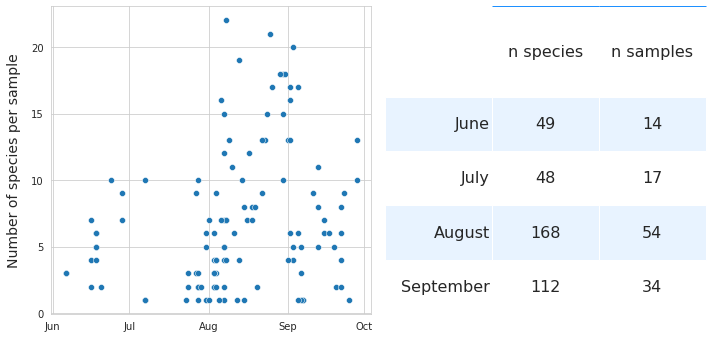

In [8]:
# the survey data
sdata = pd.read_csv("resources/hd_samples_2020.csv")
sdata['date'] = pd.to_datetime(sdata.date)
sdata = sdata[(sdata.date > "2020-05-31")&(sdata.date < "2020-10-01")].copy()

# set some variables for the charts
xlab_k14 = {'labelpad':10, 'fontsize':14}
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(10,5))

ax = axs[0]

data = sdata.groupby(['loc_date', 'date'], as_index=False).species_slug.nunique()

sns.scatterplot(data=data, x='date', y=data.species_slug, ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# ax.get_legend().remove()
ax.set_xlabel(" ")
ax.set_ylabel("Number of species per sample", **xlab_k14)
axtwo = axs[1]

sdata['month'] = sdata.date.dt.month_name()
sdata['eom'] = sdata['date'].map(lambda x: pd.Period(x, freq='M').end_time.date())

data = sdata.groupby(['month', 'eom'], as_index=False).agg({'species_slug':'nunique', 'loc_date':'nunique'})
datax = data.sort_values(by="eom")
data = datax[["month", "species_slug", "loc_date"]].copy()
data.rename(columns={"species_slug":"n species", "loc_date":"n samples"}, inplace=True)

# clean up the axis
hide_spines_ticks_grids(axtwo)

# add a table to the axis with data
the_table_ax = axtwo.table(data.values,  colLabels=data.columns, colWidths=[.33, .33, .33], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,data.columns, font_size=16, s_et_bottom_row=False)

# remove the cell text from [0,0], the index name
a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.show()

*Number of species and samples per month June through September 2020*

## Data sources

The primary source of reference data is Info Flora, the organization charged with monitoring plant ecology nationally in Switzerland and making the data available to the public and for research and reporting purposes. The data sets downloaded were the following: </p>

* Bio-geographical regions: The locations of botanical observations in Switzerland are available to the public in one of two ways. In conforming with international standards, exact data is not provided to the public except upon special request to minimize potential damage the public may cause to the plants for one reason or another. The first aggregation of observations is done by dividing Switzerland into hundreds of bio-geographical regions, called the Welten Sutter maps. The second divides Switzerland into 5x5 kilometer squares and aggregates the data in each square. The Welten Sutter and 5x5 species lists that coincided with the locations of my surveys were downloaded to compare my observations to those I would be expected to encounter based on these data sources.
* Invasive species: Info Flora also maintains a list of potentially and actually invasive species, classified into "watch list" and "black list". Watch list species threaten to expand and become an issue and planting them should be discouraged, while black list species have already had a significant environmental, economic or human effect in Switzerland. In addition, this list includes the species barred from being sold, planted or used commercially.
* IUCN Red List: The International Union for the Conservation of Nature red list is the international standard for tracking the threats faced by different species. For Switzerland, this list is also managed by Info Flora. The latest dataset was downloaded to determine the protection status of the different categories of species identified.
* Other: Two other data sets were downloaded from the Info Flora website, the list of under-sampled taxa and the list of species that appear on the certification exams for the Swiss Botanical Society. With these data sets I wanted to find out how relevant the certification list of species is to the flora I found around Biel, as well as see if there were any under-sampled taxa identified in my surveys.
* GBIF: The Global Biodiversity Information Facility hosts an Info Flora dataset available for use to the public. This data was downloaded and inspected but not put to use.

There are a number of other potentially useful data sources available through the work of third parties. The data previously discussed provided more than enough of a foundation for the introductory analysis that is the primary objective of this report, and thus third party data was not included in this report. To name a few interesting data sources for 2021 that could requested to build off of this analysis:

* Request more detailed geographical data from Info Flora on the species identified in and around Biel
* Request the dataset of the Cadastre des Arbes of Bienne to easily import the majority of tree species in and around Bienne
* Integrate biogeographical data on inverterbates tied to specific plant speices identified.

## Tools

The tools used in this project amounted to about CHF 400 (not counting my camera and smartphone), the most significant expenditure being the 5th edition of Flora Helvetica. My botanical kit was comprised of the following:
    
* Botanical loop 8x/16X
* Digital Microscope 60X-300X
* Flora Helvetica 5th edition
* Scissors, knife, razorblade
* Glass containers, a few tupperwares, plastic and paper bags
* Samsung A7 smartphone
* Sony Cybershot digital camera

A number of different plant identificaiton application were downloaded and tried, with <a href="https://floraincognita.com/">Flora Incognita</a> and <a href="https://plantnet.org/">PlantNet</a> being clearly the two most appropriate options. I chose to record my observations primarily in Flora Incognita for this project, which was not the superior option. Although the PlantNet tool has a few advantages over Flora Incognita, neither of these were the most suitable ways to record and store the mass of observations. It is unnecessary to store a picture for every single observation, especially for common species. In addition, the nomenclature is not the same across Info Flora, Plant Net and Flora Incognita. It is thus superior to use the nomenclature of Info Flora to store the survey data for compatbility with datasets provided by Info Flora and to ease ultimate submission of the observations to Info Flora as well. As such, this should be done via the <a href="https://www.infoflora.ch/fr/participer/mes-observations/app/florapp.html">Florapp</a> application or recorded in a botanical journal and subsequently entered into a database using the same nomenclature.
<p>&nbsp;</p>
Below is a short comparison of the PlantNet and Info Flora applications.

* Both applications generally came up with the same usually accurate top reccomended observation.
* Both applications allow for easy export to CSV.
* Both applications are user friendly and accessible.
* PlantNet offered more reccomendations for similar species
* PlantNet has a significantly higher investment in the look, useability, and frontend of the user portal.
* PlantNet's GPS was significantly more accurate, while Flora Incognita's could be off by 500 meters in the same location.
* Neither application allowed the user to simply enter plant observations without photos.
* Neither application is linked formally to Switzerland's national database managed by Info Flora.

Since Florapp, the application from Info Flora to record vascular plants in Switzerland, will be offering an automic plant identification service, I expect that this will become the clearly superior option for both identification and survey purposes.
<p>&nbsp;</p>

*The different plant identification and data storage applications*

In [9]:
# fig = plt.figure(figsize=(12,8))

# # check gridspec at:
# # https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html
# gs = GridSpec(8,14, figure=fig)

# # read images
# # check mp images at https://matplotlib.org/stable/tutorials/introductory/images.html
# img_A = mpimg.imread('resources/pictures/FloraIncognita.jpg')
# img_B = mpimg.imread('resources/pictures/FlorApp.jpg')
# img_c = mpimg.imread('resources/pictures/PlantNet.jpg')

# # assign a grid space
# axone = fig.add_subplot(gs[:, 0:5])
# axtwo = fig.add_subplot(gs[:, 5:10])
# axthree = fig.add_subplot(gs[2:,10:])

# # titles for each image
# titles = ["Flora Incognita", "FlorApp", "PlantNet"]

# # format each axis
# for i, an_ax in enumerate([axone, axtwo, axthree]):
#     hide_spines_ticks_grids(an_ax)
#     an_ax.set_xlabel(titles[i], fontsize=16, loc='left', labelpad=15)
    
# # show images
# axone.imshow(img_A)
# axtwo.imshow(img_B)
# axthree.imshow(img_c)


# plt.tight_layout()
# plt.show()


## Methodology

The surveys attempt to answer the question “what are the different types of herbaceous plants flowering in this location?" At first I focused on herbaceous plants that I felt I had a good chance to identify, namely the plants in full bloom that were relatively tall and recognizeable, such as the *Alcea rosea* pictured below. Although passingly familiar with some of the flora of North America, I had never examined in detail the flora around me in Europe. Plants were identified both in situ and ex situ by combining the two automatic plant identification tools mentioned previously and the 4th edition of the Flora Helvetica guidebook. For June and July, I used primarily PlantNet, while from July 31st through September 30th, I used the FloraIncognita application as the principal method to record and store the species observations. I did not identify subspecies.
<p>&nbsp;</p>
The approach was the following:
1. first the plant would be identified with a picture through PlantNet or Flora Incognita
2. then the most likely species was searched in Flora Helvetica to determine if the match was correct or not. If confirmed, the result was accepted and stored in the application.
3. If the match was unsatisfactory, the other suggested species were examined until a good match was found. 
4. If no species was a satisfactory match, it was either ignored (there were many plants that I could not identify, especially in June and July) or saved as unknown. If it was saved as unknown a sample and/or detailed pictures were taken for examination at home. In the interest of preserving the flora examined, relatively few samples were taken.
5. Samples were exmained under a microscope to identify plant anatomy and some samples were dried and preserved.

This methodology allowed me to get started identifying plants right away thanks to the automated suggestions from the identification apps. At the same time, the thorough use of the guidebook allowed me to verify these identifications and be much more confident in reporting these observations. By gradually increasing the groups of herbaceous plants that I identified during the surveys, I was able to take the time needed to be fairly certain about my observations even from the beginning of this project. As time went on, I included further herbaceous plants, shrubs and small trees and especially more of the plants from the Asteraceae family (the so-called Darn Yellow Composites). As such, the range of species increased over time and by the end of the survey period, the tall trees, decorative-type shrubbery, and grasses remained the only groups that I had made little effort to identify. 
<p>&nbsp;</p>
A survey is uniquely identified by a place name and a date and is composed of a collection of individual species observations, each of which records the following information: place, date and scientific name. I chose many survey locations to be somewhat measurable and recognizable from satellite imagery and I relied on the GPS point stored by the Flora Incognita application and Google MyMaps. The upside of such a regime is that it allowed me to place the records on a map of the city while I focus on the actual identification of plants and introduction to botany and plant anatomy. The downside is that I do not have length records and some of the survey locations are inexact due to poor GPS readings identified only towards the end of the project. Included with each survey are pictures of the survey locations, pictures of many of the individual plant species, and notes/drawings that acocmpany the survey. The place name corresponds to a gps coordinate. 
<p>&nbsp;</p>
After initially attempting to follow a simple and a belt transect methodology for these surveys, I realized that the surey sites were not conducive to such a methodology nor did I have the necessary botanical experience. Since I was surveying only a range of species and only those that were in flower, I was not able to identify enough species along the transect points without laying them out in a deliberate fashion which ruins the transect. Therefore I simply identified to the best of my ability all of the plants on a given survey site.

In [10]:
# this_picture = PILImage.open("resources/pictures/alcea-rosea.JPG")
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='jpeg')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*Alcea rosea is a large, easy to recognize plant.*

In [11]:
# this_picture = PILImage.open("resources/pictures/energie-2.JPG")
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='jpeg')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*Another large, easy to recognize plant is the vine Clematis vitalba which thrived throughout the survey area.*

In [12]:
# this_picture = PILImage.open("resources/pictures/matricaria-1-out.JPG")
# output = io.BytesIO()
# this_picture.thumbnail((800, 1200))
# this_picture.save(output, format='jpeg')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# md(html)

*Many members of the Asteraceae family, like this Matricaria chamomilla are much more difficult to identify.*

## Results

Summary statistics

There was a wide variation in species identified and in the number of species on each site. The most common genus and species are summarized in the table below. These results should be interpreted carefully. For example, *Trifolium Pratense* and *Trifolium medium* look quite similar and are both included under *T. pratense* in this data set. In addition, *Trifolium repens* was not included in the surveys until near the end of the survey period, despite being extremely common. In addition, the near total exclusion of very common species such as *Lontodon sp.*, *Taraxacum sp.* and *crepis sp.* from this dataset certainly affects these results. This will be in part corrected in the 2021 surveys, although efficiently identifying members of the Asteraceae family is an art form that takes years.

In [13]:
# all the survey locations
survey_locations = pd.read_csv("resources/map-keys.csv")

# the locations concerned by this report
report_locations = pd.read_csv("resources/locations_in_report.csv")
r_locs = report_locations.place.unique()

# the survey results for the locations within the sampling period and geographic constrains
s_data = sdata[sdata.place_slug.isin(r_locs)].copy()
p_this = sdata.agg({'species_slug':'nunique', 'loc_date':'nunique', 'place_slug':'nunique'})

a_summary = F"""
There were {p_this.loc['species_slug']} different species indentified in {p_this.loc['loc_date']} surveys from
{p_this.loc['place_slug']} different locations.
"""
md(a_summary)


There were 227 different species indentified in 119 surveys from
98 different locations.


### The ten genus and species recorded the most often

*__Right:__ the ten species recorded the most often. __Left:__ the ten genus recorded the most often*

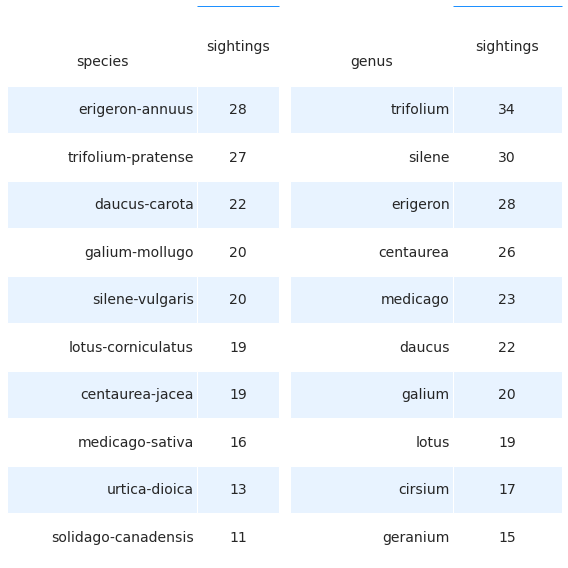

In [14]:
# top ten most commonly identified species (species_topten):
species_topten = s_data.species_slug.value_counts().sort_values(ascending=False)[:10]

# top ten most commonly identified genus (genus_topten)
# make a column of the first word of the species_slug
s_data['genusx'] = s_data.species_slug.str.split('-')
s_data['genus']  = s_data.genusx.map(lambda x: x[0])

# get the value counts
genus_topten = s_data.genus.value_counts().sort_values(ascending=False)[:10]

# put that in a table
fig, axs = plt.subplots(1,2, figsize=(8,8))

axone=axs[0]

data = list(zip(species_topten.index.values, species_topten.values))

collabels = ["species", "sightings"]
# clean up the axis
hide_spines_ticks_grids(axone)

# add a table to the axis with data
the_table_ax = axone.table(data,  colLabels=collabels, colWidths=[.7, .3], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

axtwo=axs[1]

data=list(zip(genus_topten.index.values, genus_topten.values))

collabels = ["genus", "sightings"]
# clean up the axis
hide_spines_ticks_grids(axtwo)

# add a table to the axis with data
the_table_ax = axtwo.table(data,  colLabels=collabels, colWidths=[.6, .4], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

plt.tight_layout()
plt.show()

*The ten genus recorded the most often*

### *The ten survey locations with the highest number of unique species*

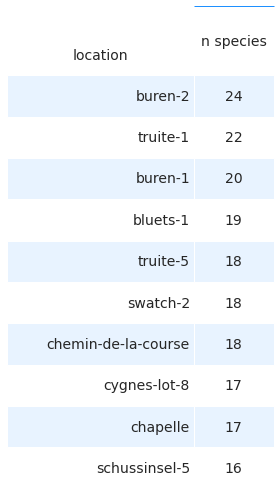

In [15]:
# The ten survey locations with the highest number of unique species (sl_mostspecies)
sl_mostspecies = s_data.groupby('place_slug', as_index=False).species_slug.nunique().sort_values(by='species_slug', ascending=False)

# put that in a table
fig, axs = plt.subplots(figsize=(4,7))

axone=axs

data = sl_mostspecies[:10].values

collabels = ["location", "n species"]
# clean up the axis
hide_spines_ticks_grids(axone)

# add a table to the axis with data
the_table_ax = axone.table(data,  colLabels=collabels, colWidths=[.7, .3], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

plt.tight_layout()
plt.show()

In [16]:
# get the value counts per species per location
# this does not seem important given the request below
species_type_count_location = pd.DataFrame(s_data[['place_slug', 'species_slug']].value_counts())
genus_type_count_location = pd.DataFrame(s_data[['place_slug', 'genus']].value_counts())
st_cl = species_type_count_location.reset_index()
gt_cl = genus_type_count_location.reset_index()

# solve for a summary of the number of genus and species at a specific location
buren2_species = st_cl.loc[st_cl.place_slug == 'buren-2']

### Identified plants on IUCN red list

The IUCN maintains the world's leading database of information on extinction and rarefaction risk in animal, fungus and plant life. Switzerland follows the IUCN protocols and recently updated its database with data from 2019. Checked against this database, almost all species identified during the surveys were classified as "LC" or Least Concern on a national level, and also within the Jura and Middle Plateau regions. This result is to be expected as only the most robust and common species would be expected to be found in such an urban setting. There were however 3 species that were identified as Near Threatened, namely *Epilobium dodonaei*, *Dipsacus pilosus*, and *Cyclamen hederifolium*. High resolution pictures are available for the first two below. The E. dodonaei appeared to be planted by a resident along the river and the C. hederifolium appeared to be planted by the Ville de Bienne in the Parc Municipal. On the other hand, the D. pilosus appeared to be spontaneous with no obvious source nearby. One other species, Carduus personata, is of Least Concern on a national level, but is considered Near Threatened in the Middle Plateau.



*Species identified during the sampling period that are on the IUCN red list*

*NT = Near Threatened*

In [17]:
#insert epilobium dodonaie-jpg and dipsacus-pilosela.jpg below.

# rename the columns with the following dictionairies
endangerdict = {
    "LC": "Least Concern",
    "NT": "Near Threatened",
    "VU": "Vulnerable",
    "EN": "Endangered",
    "CR": "Critically Endangered",
    "DD": "Data deficient",
    "NE": "Not Evaluated",
    "RE": "Regionally Extinct",
    "CR": "Critically Endagered, probably extinct",
    "-": "UNKNOWN",
    "NA": "NA"
}


# map this to
# df.this_key.map(lamda x: region_dict[x])
regiondict = {
    "JU": "Jura",
    "MP": "Central Plateau",
    "CH": "National"
}

def to_species_slug(x):
    try: 
        int_data = x.split()
        data = "-".join(int_data)
        data = data.lower()
    except:
        data = "none"
    return data

red_list_data=pd.read_csv("resources/redlist.csv")
red_list_data['slug'] = red_list_data.scientific_name.map(lambda x: to_species_slug(x))
rmap = red_list_data[['slug', 'CH']].set_index('slug')
rmapju = red_list_data[['slug', 'JU']].set_index('slug')
rmapmp = red_list_data[['slug', 'MP']].set_index('slug')
def assign_rlist_status_to_survey_data(x, amap=rmap):
    try:
        data=amap.loc[x][0]
    except:
        data="ND"
    
    return data

s_data["CH"] = s_data.species_slug.map(lambda x: assign_rlist_status_to_survey_data(x, amap=rmap))
s_data["JU"]= s_data.species_slug.map(lambda x: assign_rlist_status_to_survey_data(x, amap=rmapju))
s_data["MP"]= s_data.species_slug.map(lambda x: assign_rlist_status_to_survey_data(x, amap=rmapmp))

a = s_data.groupby(['species_slug', 'CH', 'JU', 'MP'], as_index=False).agg({'loc_date':'nunique', 'place_slug':'nunique'})

# species with no data from red list
norlist_data = a[a.CH == 'ND']

# NT = near threatened = first level of being endangered
# geolocate these points
near_threatened = s_data[(s_data.CH=="NT")|(s_data.JU == "NT")|(s_data.MP == "NT")].copy()

data = near_threatened[['date', 'species_slug', 'place_slug', 'CH', 'JU', 'MP']].copy()
data['date'] =data['date'].dt.strftime("%Y-%b-%d")
data.rename(columns={'species_slug':'species', 'place_slug':'location'}, inplace=True)

# put that in a table
fig, axs = plt.subplots(figsize=(9,len(data)*.7))

axone=axs

collabels = data.columns

# clean up the axis
hide_spines_ticks_grids(axone)

# add a table to the axis with data
the_table_ax = axone.table(data.values,  colLabels=collabels, colWidths=[.15, .25, .2, .08, .08, .08], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data.values,collabels, font_size=12, s_et_bottom_row=False)

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'scientific_name'

### Biogeographic regions

The survey data was also compared with the official survey data available from Info Flora in both the Welten Sutter and the 5x5 observation maps. There were several species that did not appear on these maps because they are not indigenous to Switzerland and more commonly appear in private gardens in heavily urbanized and suburbanized settings with a few escapees into the immediate environs.

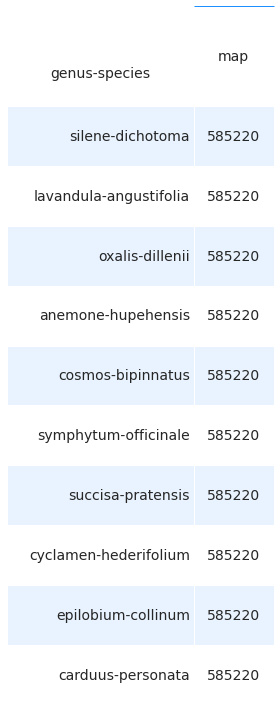

In [20]:
# from the surveys:
# identify any plants NOT on the Welten Sutter or 5X5 observations list for their region
# more clear def -- this goes to map data

# this is the record of each species and on what map it has been recorded
observed = pd.read_csv("resources/species_map_located.csv")

# index to the species
observed.set_index('species_slug', inplace=True)

# gather the columns for each map
b = observed[['585215', '585220', '580220', '580215', '625165', '625170', '550185',
       '575210', '600200', '575245', '545180', '575215']]

# survey location information has the map number for each location
survey_locations = pd.read_csv("resources/map-keys.csv")
s_locs = survey_locations[survey_locations.place.isin(sdata.place_slug.unique())].copy()

# these are duplicate records for the survey locations
s_locs = s_locs.drop([107, 110])

# key place to map number
s_ws = s_locs[['place', 'ws']].set_index('place')
s_5x = s_locs[['place', '5x5']].set_index('place')

# key species to map number by the place
s_data['ws'] = s_data.place_slug.map(lambda x: s_ws.loc[x, 'ws'])
s_data['5x'] = s_data.place_slug.map(lambda x: s_5x.loc[x, '5x5'])

# collect all the unique species recorded for the survey periond
myspecs = s_data.species_slug.unique()

# places to store values
success = []
no_success = []
no_match = []
match_no_element = []

# check for a previous occrence of each species on the ws maps
for a_spec in myspecs:
    a = s_data[s_data.species_slug == a_spec].ws.unique()
    for element in a:
        try:
            c = b.loc[a_spec][str(element)] == 0
            if c:
                success.append((a_spec, element))
            else:
                    no_success.append((a_spec, element))
        except:
            # recorded observations that do not appear in observed
            match_no_element.append((a_spec, element))
            
# check for a previous occrence of each species on the 5x maps
for a_spec in myspecs:

    a = s_data[s_data.species_slug == a_spec]['5x'].unique()
    for element in a:
        try:
            c = b.loc[a_spec][str(element)] == 0
            if c:
                success.append((a_spec, element))
            else:
                no_success.append((a_spec, element))
        except:
            match_no_element.append((a_spec, element))


# these are the species that were not previously identified on the ws or 5x5 map
data = success

# put that in a table
fig, axs = plt.subplots(figsize=(4,10))

axone=axs

collabels = ["genus-species", "map"]

# clean up the axis
hide_spines_ticks_grids(axone)

# add a table to the axis with data
the_table_ax = axone.table(data,  colLabels=collabels, colWidths=[.7, .3], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

plt.tight_layout()
plt.show()

### Non-native species

Four varieties of invasive species were repeatedly encountered:

* Erigeron Annuus, a North American species of the Asteraceae family that in considered invasive across Switzerland and Europe. In Switzerland it is generally restricted to areas of less than 1000 meters of altitude (<a href="https://www.infoflora.ch/assets/content/documents/neophytes/inva_erig_ann_f.pdf">Info Flora fact sheet</a>)
* Solidago sp: Solidago Canadensis, S. gigantea, S. nemoralis. Again, three members of the Asteraceae family imported from North America and restricted to less than 1000 meters of altitutde. It is likely that I was unable to distinguish between these three plants properly during this survey, so I have chosen to group them all under Solidago sp. as I had not encountered any of the other members of the Solidago genus. (<a href="https://www.infoflora.ch/assets/content/documents/neophytes/inva_soli_can_f.pdf">Info Flora fact sheet</a>)
* Buddleja davidii, a Chinese shrubby tree introduced for its ornate, strongly scented purple flowers. It has since naturalized and has a problematic tendency to interrupt normal patterns of plant secession in disturbed areas. A plant of the Central Plateau. (<a href="https://www.infoflora.ch/assets/content/documents/neophytes/inva_budd_dav_f.pdf">Info Flora fact sheet</a>)
* Senecio Inaequidens, another member of the Asteraceae family, but from South Africa, restricted largely to the Central Plateau and areas under 1000 meters of altitude. Its habitat is largley road vergers and railroad berms. (<a href="https://www.infoflora.ch/assets/content/documents/neophytes/inva_sene_ina_f.pdf">Info Flora fact sheet</a>)
* Interestingly, no Reynoutriea japonica (<a href="https://www.infoflora.ch/assets/content/documents/neophytes/inva_reyn_jap_f.pdf">Info Flora fact sheet</a>) were encountered during the surveys.

Conyza canadensis, another member of the Astereaceaea family from North America with some potential for , was relatively common in disturbed areas.






In [21]:
# fig, ax = plt.subplots(1,2, figsize=(16,9))

# # read in images
# img_A = mpimg.imread('resources/pictures/solidalgo-1.JPG')
# img_B = mpimg.imread('resources/pictures/iledelasuze2.JPG')

# # titlels for the images
# titles = ["Solidago sp", "Erigeron annuus"]

# for i, an_ax in enumerate([ax[0], ax[1]]):
#     hide_spines_ticks_grids(an_ax)
#     an_ax.set_title(titles[i], fontsize=18, ha='left', loc='left', pad=15)    

# ax[0].imshow(img_A)

# ax[1].imshow(img_B)

# plt.tight_layout()

# plt.show()

*Left: Thick patch of Solidago sp. in an empty lot near the Madretschkanal". Right: Erigeron annuus on the Ile de la  Suze park*

### Survey locations and number of species identified

*sample gis output*

In [22]:
# format near threatened map layer
nt_tomap = near_threatened[['species_slug', 'place_slug', 'str_date', 'JU']][near_threatened.JU == 'NT'].copy()
nt_locs = s_locs[s_locs.place.isin(nt_tomap.place_slug.unique())].copy()

nt_locs.set_index('place', inplace=True)
nt_map = nt_tomap.set_index('place_slug')

nt_map = pd.concat([nt_locs, nt_map], axis=1)

nt_map.reset_index(inplace=True)
nt_map.to_csv('resources/near_threatened.csv', index=False)

# map results to gis data
sp_loc = sl_mostspecies.set_index('place_slug').species_slug

# ! this needs to be recovered  what is the data source for inv_specs? !
# insert table with the locations invasive species were identified (rows = locations, columns = invasive species)
# make map points that designate location and push tabe to append
# spinv = inv_specs.species_slug.unique()

# only the surveys that have a red list species:
# sd_inv = sdata[sdata.species_slug.isin(spinv)].copy()
# n_inv_specs_location = sd_inv.groupby([ 'place_slug'], as_index=False).species_slug.nunique()

# inv_loc =n_inv_specs_location.set_index('place_slug').species_slug

# def add_zero_if_exception(x, key):
#     try:
#         data = key.loc[x]
#     except:
#         data = 0
#     return data

# # export gis file with location data and # of species identified both periods
# the periods need to be defined
s_locs['n species'] = s_locs[s_locs.place.isin(s_data.place_slug.unique())].place.map(lambda x: sp_loc.loc[x])
# s_locs['n invspecs'] = s_locs.place.map(lambda x: add_zero_if_exception(x, inv_loc))

filename = "hdbot_final_map_2.csv"
s_locs.to_csv(F"resources/{filename}", index=False)

this_picture = PILImage.open("resources/final_map.jpeg")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))
this_picture.save(output, format='jpeg')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

NameError: name 'near_threatened' is not defined

## Lessons Learned and Reccomendations

The objective of this pilot project was to learn to identify herbaceous plants, construct an initial dataset on the flowering plants along the urban Suze river, and provide initial analysis and lessons learned to guide further project development. The first objective was unambiguously reached and I now have a familiarity with the common plants, outside of grasses, that grow along the Suze river, and by extension a good grasp of the plants around the city of Bienne more generally. The second objective was reached as well, but in a less satisfactory manner. With some 900 observations, I was able to engage with the biogeographic data sets available and provide simple analysis. At the same time, the learning process significantly slowed the collection of data. In addition, the GPS coordinates reported by Flora Incognita were not verified and later found to be off on the order of 250 meters for every single observation. The locations were largely reconstructed via photos, memory and imagery available through Google Maps and Swiss Topo, but many observations were also unfortunately lost. Nonetheless, I was able to identify some plant communities and give some indications of the herbaceous plants one finds along ths urban Suze river.

The third objective has also been reached. In addition to surveying, I researched current Swiss and French initiatives in citizen science related to conservation of insects and plants as well as read articles, papers and books on ecology, botany, zoology, entomology, horticulture, geology and climate change. The key general points that I took away from this background reading are the following:

* The situation is serious. There is a generalized decline across all indicators of ecological health across the world.
* The central plateau of Switzerland has many species that are locally menaced with many species that 
* There is a market and an appetite for products that create ecosystem services.
* species diversity is only one part of biodiversity and ecological health. The diversity of ecological systems in which species interact is also an aspect of biodiversity, as is the genetic diversity within species' populations.
* Floral resources should be available from March to October to support hibernating pollinators and other insects.

In order to build on this dataset for 2021, the following is recommended for a 2021 round of surveying:

* In addition to surveying, value should be created during the survey itself. One obvious way to do this is to remove invasive species when encountered during the surveys to inhibit their proliferation in the public spaces.
* The surveys should be repeated starting from March 2021 to capture earlier blooming plant species (especially in March, April and May) as well as to capture some of the surrounding forested regions (e.g. the vorhölzli, längholzli) and other urban green spaces not restricted to the Suze river. The surveys should include a wider diversity of plants from the outset now that the surveyor has a good grasp on the local flora.
* Identification of actors around Biel/Bienne constructively engaged in protecting biodiversity of plants, including the genetic diversity provided by wild populations.
* Integration of info species data on pollinators and creation of a link to their preferred floral resources
* Integration of plant data from the City of Bienne (Cadastre des arbres)
* Use of Info Flora's FlorApp or a dedicated botany journal to exclusively record observations.

During the 2021 surey process, I will engage further with the field of horticulture with the end goal of developing a product that can bring value to the city of Bienne based on the plants that I find (or don't find) living in the city.